Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
%matplotlib inline

/home/pruvolo/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [2]:
import brfss

data = brfss.ReadBrfss()
data.head()

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82,2,76.363636,185.870345,70.91,157
1,65,2,72.727273,126.603027,72.73,163
2,48,2,NaN,181.063210,NaN,165
3,61,1,73.636364,517.926275,73.64,170
4,26,1,88.636364,1252.624630,88.64,185


In [3]:
import numpy as np
height_weight = data[['wtkg2','htm3']]
height_weight = height_weight.dropna()
height_weight.isnull().mean()

wtkg2    0
htm3     0
dtype: float64

In [15]:
height_weight['logwtkg2'] = np.log10(height_weight.wtkg2)

In [16]:
import thinkstats2

intercept, slope = thinkstats2.LeastSquares(height_weight.htm3,
                                            height_weight.logwtkg2)

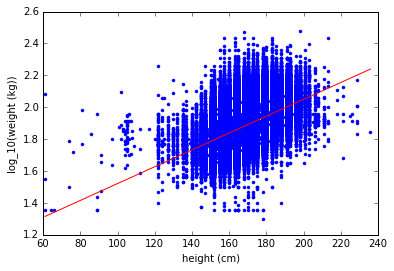

In [17]:
import matplotlib.pyplot as plt

plt.plot(height_weight.htm3, height_weight.logfinalwt,'b.')
xs = min(height_weight.htm3), max(height_weight.htm3)
plt.plot(xs, [xs[0]*slope + intercept, xs[1]*slope + intercept],'r')
plt.xlabel('height (cm)')
plt.ylabel('log_10(weight (kg))')
plt.show()

### Interpreting the Model

The model we've fit is:

$\log_{10} \mbox{weight_kg} = \mbox{slope} \times \mbox{height_cm} + \mbox{intercept}$

If we exponentiate both sides we get:
$\mbox{weight_kg} = 10^{\mbox{slope} \times \mbox{height_cm}}\times 10^\mbox{intercept}$.  

To make things more interpretable, we can replace $\mbox{height_cm}$ with the deviation from the average height (which is about 170cm).

$\mbox{weight_kg} = 10^{\mbox{slope} \times \left (\mbox{height_cm} - 170 \right)}\times 10^{\mbox{intercept}+170 \times \mbox{slope}}$

Plugging in the specific value for intercept and slope gives us:

$\mbox{weight_kg} = 77.8 \times 10^{\mbox{slope} \times \left (\mbox{height_cm} - 170 \right)}$

To understand this further let's consider the weight ratio for someone that is 171cm versus 170cm.

$\begin{align}
\frac{\mbox{weight_kg}(171cm)}{\mbox{weight_kg}(170cm)} &= \frac{77.8 \times 10^{\mbox{slope} \times 1}}{77.8 \times 10^{\mbox{slope} \times 0}} \\
&= 10^{\mbox{slope}} \\
&= 1.0122
\end{align}$

Which is a percentage increase of $1.22\%$ per cm of additional height.
For those that are not metrically inclined, we can reframe the equation using inches and pounds.

$\mbox{weight_lb} = 171.2 \times 10^{0.0134 \times \left (\mbox{height_in} - 67 \right)}$

Which means that a person's expected weight increases from 171.2 pounds by $3.1\%$ for every inch of height over 5 foot 7 inches (similarly a decrease in $3.1\%$ would be expected for every inch under 5 foot 7 inches).

### How much does it help?

To determine how much it helps we can compute the coefficient of determination.  We'll do this for both height predicting weight and height predicting $\log_{10}$ weight.

In [24]:
original_variance = thinkstats2.Var(height_weight.logwtkg2)
final_variance = thinkstats2.Var(height_weight.htm3*slope + intercept - height_weight.logfinalwt)
print "coeff determination log", 1 - final_variance/original_variance

original_variance_no_log = thinkstats2.Var(height_weight.wtkg2)
final_variance_no_log = thinkstats2.Var(10**(height_weight.htm3*slope + intercept) - height_weight.wtkg2)
print "coeff determination no log", 1 - final_variance_no_log / original_variance_no_log

coeff determination log 0.282734943119
coeff determination no log 0.262774075792
